## Examples of using functions in the [`fanc` python package](https://github.com/htem/FANC_auto_recon/tree/main/fanc).

Before starting, be sure you've followed the [installation instructions](https://github.com/htem/FANC_auto_recon#installing-and-configuring-the-fanc-python-package).

In [ ]:
import fanc

Let's look up the latest segment ID for the FANC homepage neuron by giving the homepage point coordinate to `fanc.lookup.segids_from_pts()`.  
(See [Neuroglancer states for proofreading](https://github.com/htem/FANC_auto_recon/wiki/Neuroglancer-states-for-proofreading) for the "homepage" neuroglancer state which shows this neuron/coordinate.)

In [ ]:
from datetime import datetime, timezone
now = datetime.utcnow()

homepage_neuron_segid = fanc.lookup.segids_from_pts([48848, 114737, 2690], timestamp=now)
# This should give 648518346481082458 as of Feb 11, 2023
print('Homepage neuron segid:', homepage_neuron_segid[0])

# Look up the entry in the soma table for this neuron
homepage_neuron_soma = fanc.lookup.somas_from_segids(homepage_neuron_segid, timestamp=now)
print('Homepage neuron soma info:')
homepage_neuron_soma

### 3D rendering
Let's plot some neurons aligned to the VNC template.

To use `fanc.plot_neurons()` with the default setting of `template_space='JRC2018_VNC_FEMALE'`, you will need to have done the optional elastix/transformix setup steps during installation. If you skipped those steps, you can specify `template_space=None` when calling `fanc.plot_neurons` to see the neuron in FANC-space instead of being template-aligned.

This function will generate a popup window that you can interact with (rotate around, etc). When you're done, press Q while the popup window is selected to allow your notebook to continue.

In [ ]:
# Show a 3D render of the neuron aligned to the template space, with FANC outlines displayed
# Note that `template_space='JRC2018_VNC_FEMALE'` is the default behavior, just specifying it here for clarity
fanc.plot_neurons(homepage_neuron_segid, show_outlines=True, template_space='JRC2018_VNC_FEMALE')
# You can skip warping into alignment with the template if you haven't set up elastix:
#fanc.plot_neurons(homepage_neuron_segid, show_outlines=True, template_space=None)

In [ ]:
# Check the docstring for many more options
fanc.plot_neurons?

In [ ]:
# which might lead you to notice the `save` option, which can
# be used to save publication-ready images of your neurons
fanc.plot_neurons(homepage_neuron_segid,
                  show_outlines=True,
                  template_space='JRC2018_VNC_FEMALE',
                  save=True,
                  save_path=f'./output/plot_neuron_{homepage_neuron_segid[0]}.png')

The result should look like this:  
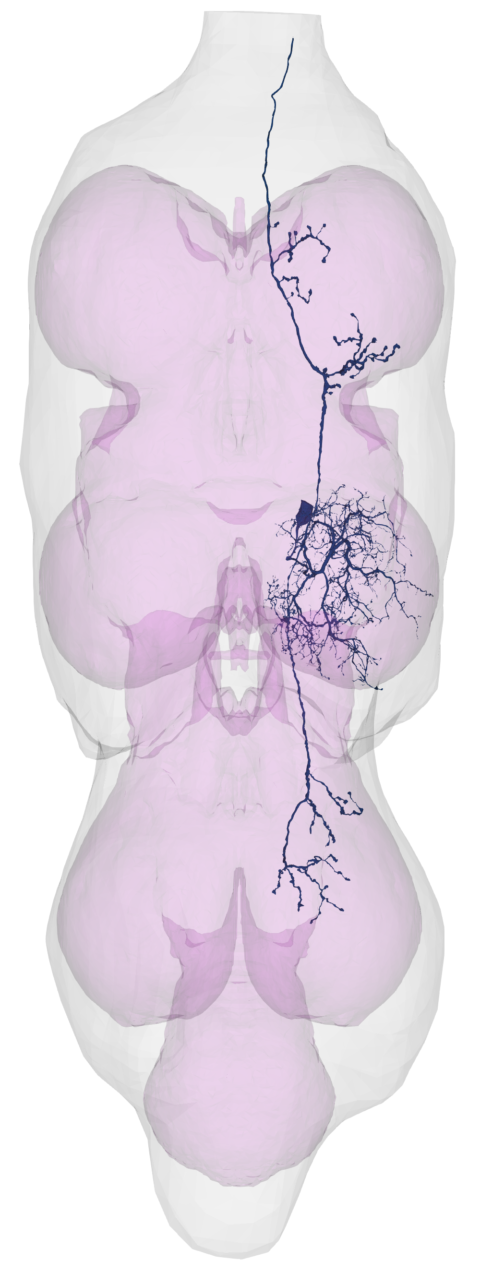

### Interacting with data in CAVE tables

In [ ]:
# The following is a simpler alternative to `client = CAVEclient('fanc_production_mar2021')`
client = fanc.get_caveclient()

You can now do all the usual fun things that CAVEclient lets you do, like query for synapses.

Let's pull some synapses, then use `fanc.synaptic_links.to_ng_annotations()` to copy these synaptic links to the clipboard in a format that can be pasted into a neuroglancer annotation layer.

In [ ]:
homepage_neuron_output_synapses = client.materialize.synapse_query(pre_ids=homepage_neuron_segid)

fanc.synaptic_links.to_ng_annotations(homepage_neuron_output_synapses)

I then went to neuroglancer, made an annotation layer, then opened up the neuroglancer state using the `{}` button, went into `"layers"`, went to the annotation layer (the last one), and pasted my clipboard contents into the `"annotations": ` line, replacing the existing `[]`.

That gave me this neuroglancer state, showing all the output synapses from the homepage neuron https://neuromancer-seung-import.appspot.com/?json_url=https://global.daf-apis.com/nglstate/api/v1/5212944610623488.

A quick exercise: How would you make a state just like this, except with all the inputs to the homepage neuron (instead of its outputs)?

### Programmatically generate neuroglancer scenes showing certain types of neurons

[`nglui`](https://github.com/seung-lab/NeuroglancerAnnotationUI) is a package to facilitate programmatically making neuroglancer scenes. We wrote `fanc.statebuilder.render_scene()` which uses `nglui` to build neuroglancer scenes relevant for FANC. For instance, you can generate the default FANC scene via:

In [ ]:
fanc.statebuilder.render_scene()

You can customize this scene in a number of ways. Check the docstring for lots of info:

In [ ]:
fanc.statebuilder.render_scene?

The main argument here is `neurons`, where you can specify some set of neurons to display. For instance, specify the name of a CAVE table to bring up all the neurons labeled by that table:

In [ ]:
fanc.statebuilder.render_scene(neurons='neck_motor_neuron_table_v0')
# Note that 'neck_motor_neuron_table_v0' is deprecated and will probably
# be replaced by an updated table in the future, but I used it here because
# it contains a nice small number of neurons (24).

For more flexibility, pull data from a table yourself, do some processing, then generate the scene:

In [ ]:
front_leg_mns = client.materialize.query_table('motor_neuron_table_v7')

# Pull out some subset of the motor neurons that we might be interested in
accessory_nerve_mns = front_leg_mns.loc[front_leg_mns.classification_system.str.startswith('A')]
ventral_nerve_mns = front_leg_mns.loc[front_leg_mns.classification_system.str.startswith('V')]

fanc.statebuilder.render_scene(neurons=accessory_nerve_mns)

The `render_scene()` command above gave me https://neuromancer-seung-import.appspot.com/?json_url=https://global.daf-apis.com/nglstate/api/v1/5373044079984640

### More info
The majority of the functions in this package have decent docstrings. By [looking through the package's modules](https://github.com/htem/FANC_auto_recon/tree/main/fanc) you can find more functions that may be useful to you.

Please also feel free to post questions on the [#code channel](https://fanc-reconstruction.slack.com/archives/CLE1R5048/p1671568387097929) on the FANC Slack, or [open an issue](https://github.com/htem/FANC_auto_recon/issues) on GitHub.